<a href="https://colab.research.google.com/github/dbengp/dio-ml/blob/main/metrica_de_avaliacao_de_aprendizado_usando_scikitlearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import itertools

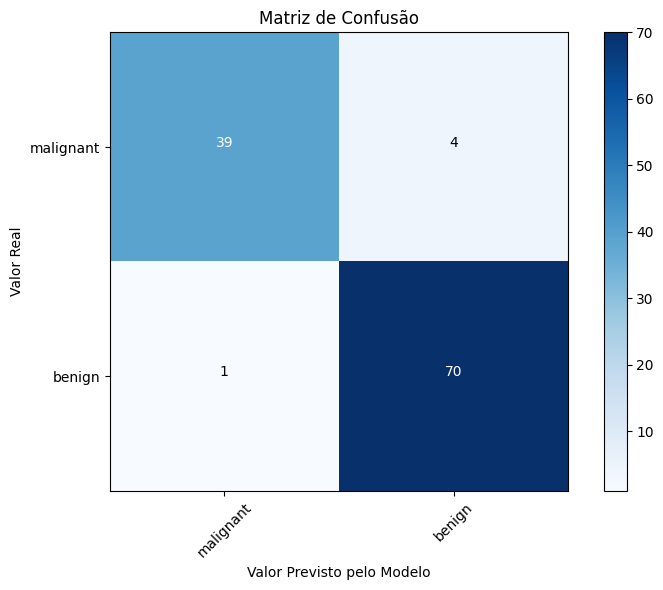

              precision    recall  f1-score   support

   malignant       0.97      0.91      0.94        43
      benign       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [4]:
# Carregando o dataset de câncer de mama
data = load_breast_cancer()
X = data.data
y = data.target

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo SVC
model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

# Fazendo as previsões
y_pred = model.predict(X_test)

# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Criando a visualização da matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
tick_marks = np.arange(len(data.target_names))
plt.xticks(tick_marks, data.target_names, rotation=45)
plt.yticks(tick_marks, data.target_names)

fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Valor Real')
plt.xlabel('Valor Previsto pelo Modelo')
plt.tight_layout()
plt.show()

# Relatório de classificação
print(classification_report(y_test, y_pred, target_names=data.target_names))